In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as pl
%matplotlib inline

path = 'dataset/'

## German

In [2]:
df_original = pd.read_csv(path + 'german.data', sep=' ', header=None)
df_original.columns = ['status_account', 'duration_month', 'credit_history', 'purpose',
                       'credit_amount', 'savings_account', 'employment_since', 'installment_rate',
                       'sex', 'other_debtors', 'residence_since', 'property', 'age', 
                       'installment_plans', 'housing', 'number_credits_this_bank', 'job', 
                       'people_liable_for', 'telephone', 'foreign_worker', 'credit_risk']
print(df_original.shape)
df_original['credit_risk'] = df_original['credit_risk'].apply(lambda row: 1 if row == 1 else 0)
df_original['age'] = df_original['age'].apply(lambda row: 0 if row <= 25 else 1)
df_original.head()

(1000, 21)


,status_account,duration_month,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,sex,other_debtors,residence_since,property,age,installment_plans,housing,number_credits_this_bank,job,people_liable_for,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,1,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,0,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,1,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,1,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,1,A143,A153,2,A173,2,A191,A201,0


In [3]:
df = df_original.groupby(['age', 'credit_risk']).size().reset_index(name='total')
df_grupo = df_original.groupby(['age']).size().reset_index(name='total_grupo')
df = pd.merge(df, df_grupo, on='age')
df['prop'] = 100 * (df['total'] / df['total_grupo'])
df

,age,credit_risk,total,total_grupo,prop
0,0,0,80,190,42.105263
1,0,1,110,190,57.894737
2,1,0,220,810,27.160494
3,1,1,590,810,72.839506


In [4]:
df['idade'] = df['age'].apply(lambda x: '<25' if x== 0 else '>=25')
df_german = pd.pivot_table(df, index='idade', columns='credit_risk', values='prop')
df_german

credit_risk,0,1
idade,,
<25,42.105263,57.894737
>=25,27.160494,72.839506


## Adult

In [5]:
label = 'Income'
protected_attribute = 'Gender'

df_original = pd.read_csv(path + 'adult.data', header=None)
df_original.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]
df_original.drop(['fnlwgt'], axis=1, inplace=True)
print(df_original.shape)

columns_correct = ['WorkClass', 'Education', 'MaritalStatus', 'Occupation', 
               'Relationship', 'NativeCountry', 'Income', 'Race', 'Gender']

for col_cat in columns_correct:
    df_original[col_cat] = df_original[col_cat].str.strip()

df_original['Race'] = df_original['Race'].apply(lambda row: 1 if row == 'White' else 0)
df_original['Gender'] = df_original['Gender'].apply(lambda row: 1 if row == 'Male' else 0)
df_original['Income'] = df_original['Income'].apply(lambda row: 0 if row == '<=50K' else 1)

df_original.head(2)

(32561, 14)


,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,1,0,0,13,United-States,0


In [6]:
df = df_original.groupby([protected_attribute, label]).size().reset_index(name='total')
df_grupo = df_original.groupby([protected_attribute]).size().reset_index(name='total_grupo')
df = pd.merge(df, df_grupo, on=protected_attribute)
df['prop'] = 100 * (df['total'] / df['total_grupo'])
df

,Gender,Income,total,total_grupo,prop
0,0,0,9592,10771,89.053941
1,0,1,1179,10771,10.946059
2,1,0,15128,21790,69.426342
3,1,1,6662,21790,30.573658


In [7]:
df['gênero'] = df['Gender'].apply(lambda x: 'feminino' if x== 0 else 'masculino')
df_adult = pd.pivot_table(df, index='gênero', columns='Income', values='prop')
df_adult

Income,0,1
gênero,,
feminino,89.053941,10.946059
masculino,69.426342,30.573658


## COMPAS

In [8]:
label = 'two_year_recid'
protected_attribute = 'race'

df_original = pd.read_csv(path + 'compas-scores-two-years.csv')
cols_name = ['race', 'age', 'c_charge_degree', 'v_score_text', 'sex', 
             'priors_count', 'days_b_screening_arrest', 'v_decile_score', 
             'two_year_recid']

df_original = df_original[cols_name]
df_original = df_original[(df_original['days_b_screening_arrest'] <= 30) &
                          (df_original['days_b_screening_arrest'] >= -30)]
print(df_original.shape)

df_original.two_year_recid = df_original.two_year_recid.replace({0:1, 1:0})
df_original = df_original.fillna('0')
df_original['race'] = df_original['race'].apply(lambda row: 1 if row == 'Caucasian' else 0)

df_original.head(2)


(6172, 9)


,race,age,c_charge_degree,v_score_text,sex,priors_count,days_b_screening_arrest,v_decile_score,two_year_recid
0,0,69,F,Low,Male,0,-1.0,1,1
1,0,34,F,Low,Male,0,-1.0,1,0


In [9]:
df = df_original.groupby([protected_attribute, label]).size().reset_index(name='total')
df_grupo = df_original.groupby([protected_attribute]).size().reset_index(name='total_grupo')
df = pd.merge(df, df_grupo, on=protected_attribute)
df['prop'] = 100 * (df['total'] / df['total_grupo'])
df

,race,two_year_recid,total,total_grupo,prop
0,0,0,1987,4069,48.832637
1,0,1,2082,4069,51.167363
2,1,0,822,2103,39.087019
3,1,1,1281,2103,60.912981


In [10]:
df['raça'] = df['race'].apply(lambda x: 'não \ncaucasianos' if x== 0 else ' caucasianos')
df_compas = pd.pivot_table(df, index='raça', columns='two_year_recid', values='prop')
df_compas

two_year_recid,0,1
raça,,
caucasianos,39.087019,60.912981
não \ncaucasianos,48.832637,51.167363


## Default

In [11]:
label = 'payment_next_month'
protected_attribute = 'sex'

df_original = pd.read_excel(path + 'default of credit card clients.xls', header=1)
df_original.columns = ['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 
                       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 
                       'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 
                       'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4',
                       'pay_amt5', 'pay_amt6', 'payment_next_month']
df_original.drop('id', axis=1, inplace=True)
print(df_original.shape)

df_original.loc[df_original['marriage'] == 0, 'marriage'] = 3
df_original.loc[df_original['education'].isin([0, 5, 6]), 'education'] = 4
df_original['sex'] = df_original['sex'].apply(lambda row: 0 if row == 2 else 1)

df_original.head(2)

(30000, 24)


,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,payment_next_month
0,20000,0,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,0,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [12]:
df = df_original.groupby([protected_attribute, label]).size().reset_index(name='total')
df_grupo = df_original.groupby([protected_attribute]).size().reset_index(name='total_grupo')
df = pd.merge(df, df_grupo, on=protected_attribute)
df['prop'] = 100 * (df['total'] / df['total_grupo'])
df

,sex,payment_next_month,total,total_grupo,prop
0,0,0,14349,18112,79.223719
1,0,1,3763,18112,20.776281
2,1,0,9015,11888,75.832773
3,1,1,2873,11888,24.167227


In [13]:
df['gênero'] = df['sex'].apply(lambda x: 'feminino' if x== 0 else 'masculino')
df_default = pd.pivot_table(df, index='gênero', columns='payment_next_month', values='prop')
df_default

payment_next_month,0,1
gênero,,
feminino,79.223719,20.776281
masculino,75.832773,24.167227


## PNAD gênero

In [14]:
label = 'renda_bin'
protected_attribute = 'genero'

df_original = pd.read_csv(path + 'pnad_processado.csv')
print(df_original.shape)

df_original.drop(['raca', 'raca_bin', 'renda'], axis=1, inplace=True)
df_original.loc[df_original['empreendimento_trabalho'] == 13, 'empreendimento_trabalho'] = 12
df_original.loc[df_original['ocupacao_trabalho'] == 10, 'ocupacao_trabalho'] = 5
df_original['genero'] = df_original['genero'].apply(lambda row: 1 if row == 2 else 0)
df_original.head(2)

(152681, 13)


,UF,genero,idade,estado_civil,anos_estudo,posicao_trabalho,faixa_horas_trab_sem,empreendimento_trabalho,ocupacao_trabalho,renda_bin
0,11,1,23,0.0,12,4.0,3.0,11.0,5.0,0
1,11,0,23,5.0,12,1.0,3.0,12.0,4.0,0


In [15]:
df = df_original.groupby([protected_attribute, label]).size().reset_index(name='total')
df_grupo = df_original.groupby([protected_attribute]).size().reset_index(name='total_grupo')
df = pd.merge(df, df_grupo, on=protected_attribute)
df['prop'] = 100 * (df['total'] / df['total_grupo'])
df

,genero,renda_bin,total,total_grupo,prop
0,0,0,56110,63629,88.183061
1,0,1,7519,63629,11.816939
2,1,0,73899,89052,82.984099
3,1,1,15153,89052,17.015901


In [16]:
df['gênero'] = df['genero'].apply(lambda x: 'feminino' if x== 0 else 'masculino')
df_pnad_gen = pd.pivot_table(df, index='gênero', columns='renda_bin', values='prop')
df_pnad_gen

renda_bin,0,1
gênero,,
feminino,88.183061,11.816939
masculino,82.984099,17.015901


## PNAD raça

In [17]:
label = 'renda_bin'
protected_attribute = 'raca_bin'

df_original = pd.read_csv(path + 'pnad_processado.csv')
print(df_original.shape)

df_original.drop(['raca', 'genero', 'renda'], axis=1, inplace=True)
df_original.loc[df_original['empreendimento_trabalho'] == 13, 'empreendimento_trabalho'] = 12
df_original.loc[df_original['ocupacao_trabalho'] == 10, 'ocupacao_trabalho'] = 5

df_original.head(2)

(152681, 13)


,UF,idade,estado_civil,anos_estudo,posicao_trabalho,faixa_horas_trab_sem,empreendimento_trabalho,ocupacao_trabalho,raca_bin,renda_bin
0,11,23,0.0,12,4.0,3.0,11.0,5.0,0,0
1,11,23,5.0,12,1.0,3.0,12.0,4.0,1,0


In [18]:
df = df_original.groupby([protected_attribute, label]).size().reset_index(name='total')
df_grupo = df_original.groupby([protected_attribute]).size().reset_index(name='total_grupo')
df = pd.merge(df, df_grupo, on=protected_attribute)
df['prop'] = 100 * (df['total'] / df['total_grupo'])
df

,raca_bin,renda_bin,total,total_grupo,prop
0,0,0,78511,86639,90.618544
1,0,1,8128,86639,9.381456
2,1,0,51498,66042,77.977651
3,1,1,14544,66042,22.022349


In [19]:
df['raça'] = df['raca_bin'].apply(lambda x: ' preto / pardo\n indígena' if x== 0 else 'branco \n amarelo')
df_pnad_raca = pd.pivot_table(df, index='raça', columns='renda_bin', values='prop')
df_pnad_raca

renda_bin,0,1
raça,,
preto / pardo\n indígena,90.618544,9.381456
branco \n amarelo,77.977651,22.022349


## Gráfico

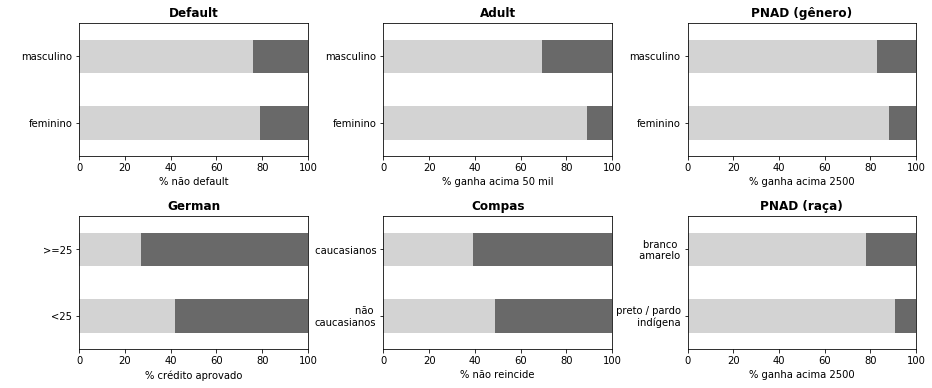

In [39]:
fig, axes = pl.subplots(nrows=2, ncols=3, figsize=(15,6))
pl.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.33, hspace=0.45)
df_default.plot.barh(stacked=True, legend=False, ax=axes[0,0], color = ['lightgray', 'dimgray'])
df_adult.plot.barh(stacked=True, legend=False, ax=axes[0,1], color = ['lightgray', 'dimgray'])
df_pnad_gen.plot.barh(stacked=True, legend=False, ax=axes[0,2], color = ['lightgray', 'dimgray'])
df_german.plot.barh(stacked=True, legend=False, ax=axes[1,0], color = ['lightgray', 'dimgray'])
df_compas.sort_index(ascending=False).plot.barh(stacked=True, legend=False, ax=axes[1,1], color = ['lightgray', 'dimgray'])
df_pnad_raca.plot.barh(stacked=True, legend=False, ax=axes[1,2], color = ['lightgray', 'dimgray'])


axes[0,0].set_xlim(0,100)
axes[0,1].set_xlim(0,100)
axes[0,2].set_xlim(0,100)
axes[1,0].set_xlim(0,100)
axes[1,1].set_xlim(0,100)
axes[1,2].set_xlim(0,100)

axes[0,0].set_title('Default', fontweight='bold')
axes[0,1].set_title('Adult', fontweight='bold')
axes[0,2].set_title('PNAD (gênero)', fontweight='bold')
axes[1,0].set_title('German', fontweight='bold')
axes[1,1].set_title('Compas', fontweight='bold')
axes[1,2].set_title('PNAD (raça)', fontweight='bold')

axes[0,0].set_ylabel(' ')
axes[0,0].set_xlabel('% não default')
axes[0,1].set_ylabel(' ')
axes[0,1].set_xlabel('% ganha acima 50 mil')
axes[0,2].set_ylabel(' ')
axes[0,2].set_xlabel('% ganha acima 2500')
axes[1,0].set_ylabel(' ')
axes[1,0].set_xlabel('% crédito aprovado')
axes[1,1].set_ylabel(' ')
axes[1,1].set_xlabel('% não reincide')
axes[1,2].set_ylabel(' ')
axes[1,2].set_xlabel('% ganha acima 2500')

# pl.savefig('disparidade_dataset.png', bbox_inches='tight', transparent=True)